In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv("cropData.csv")

In [3]:
df.head()

,Temperature,Humidity,Rainfall,Soil_pH,N,P,K,Crop,Disease
0,21.3,61.5,134.1,5.89,64,59,27,Potato,Early Blight
1,22.2,67.5,149.2,6.12,83,22,44,Potato,Late Blight
2,22.6,53.0,127.0,6.59,101,39,43,Wheat,Powdery Mildew
3,34.1,48.8,271.5,6.49,94,36,36,Rice,Leaf Blast
4,37.6,40.0,237.4,6.57,64,50,36,Cotton,Bacterial Blight


In [4]:
df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
Soil_pH        0
N              0
P              0
K              0
Crop           0
Disease        0
dtype: int64

In [5]:
df.describe()

,Temperature,Humidity,Rainfall,Soil_pH,N,P,K
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,27.421776,70.252459,180.633251,6.467085,89.844536,42.448907,36.084426
std,5.308921,12.850265,48.458867,0.441650,15.086890,9.500528,8.974150
min,13.600000,36.600000,10.700000,5.080000,50.000000,20.000000,15.000000
25%,23.000000,61.000000,150.200000,6.150000,80.000000,36.000000,30.000000
50%,27.300000,71.800000,173.600000,6.440000,91.000000,43.000000,36.000000
75%,31.600000,80.100000,205.400000,6.740000,100.000000,49.000000,42.000000
max,40.900000,104.200000,318.200000,8.280000,131.000000,67.000000,63.000000


In [6]:
la_crop = LabelEncoder()
la_disease = LabelEncoder()

In [7]:
df['cropEncoded'] = la_crop.fit_transform(df['Crop'])
df['diseaseEncoded'] = la_disease.fit_transform(df['Disease'])

In [8]:
x = df[['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'N', 'P', 'K', 'cropEncoded']]
y = df['diseaseEncoded']

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xTrain, yTrain)

RandomForestClassifier(random_state=42)

In [11]:
yPred = model.predict(xTest)

In [12]:
accuracy_score(yTest, yPred)

0.9030054644808743

In [13]:
classification_report(yTest, yPred, target_names = la_disease.classes_)

D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                       precision    recall  f1-score   support\n\n          Anthracnose       0.93      0.93      0.93        27\n           Apple Scab       0.87      1.00      0.93        26\n     Bacterial Blight       1.00      0.91      0.95        32\nBacterial Leaf Blight       0.96      0.84      0.90        32\n       Bacterial Spot       0.84      0.90      0.87        30\n          Black Scurf       0.00      0.00      0.00         3\n           Brown Spot       0.93      1.00      0.96        26\n     Cedar Apple Rust       1.00      0.90      0.95        31\n          Common Rust       0.95      0.88      0.91        24\n          Common Scab       0.93      1.00      0.96        25\n         Downy Mildew       0.00      0.00      0.00         2\n         Early Blight       0.91      0.94      0.93        72\n          Fire Blight       0.97      1.00      0.98        28\n       Gray Leaf Spot       0.95      1.00      0.98        20\n          Karnal Bunt       0.00     

In [14]:
featImportances = model.feature_importances_
features = x.columns

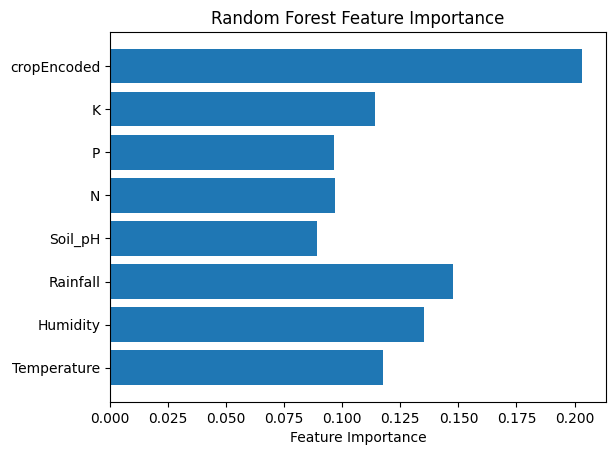

In [15]:
plt.barh(features, featImportances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [16]:
joblib.dump(model, "disease_predictor.pkl")
joblib.dump(la_crop, "crop_encoder.pkl")
joblib.dump(la_disease, "disease_encoder.pkl")

['disease_encoder.pkl']